<a href="https://colab.research.google.com/github/lucammarini/HPa/blob/main/HPa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HPa

Descrição do script

## IMPORTS

In [46]:
#### IMPORT DE BIBLIOTECAS
from matplotlib import rc
rc('animation', html='jshtml')

In [47]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation

## FUNÇÕES

In [48]:
def frame(w):
    ax.clear()
    global x,y
    x=x+np.random.normal(loc=0.0,scale=50.0,size=10)
    y=y+np.random.normal(loc=0.0,scale=50.0,size=10)

    plt.title("Brownian Motion")
    ax.set_xlabel('X(t)')
    ax.set_xlim(-500.0,500.0)
    ax.set_ylabel('Y(t)')
    ax.set_ylim(-500.0,500.0)
   
    plot=ax.scatter(x, y, c='r')
    return plot

## LOOP PRINCIPAL

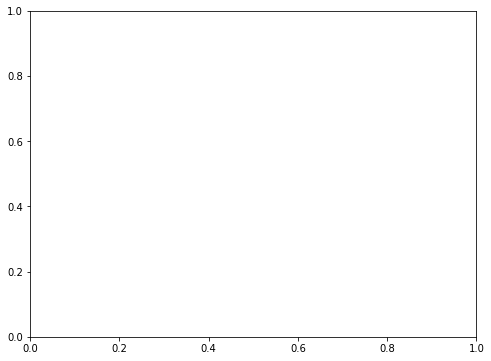

In [49]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()

N=10
x=500*np.random.random(N)
y=500*np.random.random(N)


In [50]:
anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)

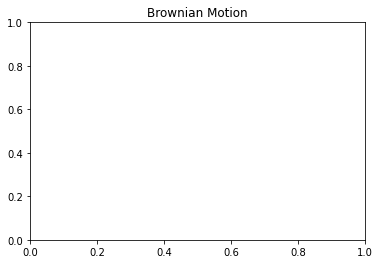

In [51]:
anim